In [80]:
#  Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.10.1


In [1]:
#  import basic required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#  Load the dataset
churn_data = pd.read_csv("Churn_Modelling.csv")
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [86]:
#  Divide the dataset into independent and dependent data

X = churn_data.iloc[:,3:13]
y = churn_data['Exited']
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [88]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [90]:
#  Feature Engineering
Geography = pd.get_dummies(X['Geography'],drop_first=True).astype(int)
Gender = pd.get_dummies(X['Gender'],drop_first=True).astype(int)

In [92]:
#  Drop Geaography and Gender from dataframe
X = X.drop(['Geography','Gender'],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [94]:
#  Concatenate Geaography and Gender with dataframe
X = pd.concat([X,Geography,Gender],axis = 1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [96]:
#  Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [98]:
#  Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [102]:
X_train.shape

(8000, 11)

In [150]:
#  Lets create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout 

In [203]:
#  Lets initialise the ANN
classifier = Sequential()

In [205]:
#  Adding the input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.3))

In [206]:
# Adding the First hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [208]:
#  Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [210]:
#  Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))
classifier.add(Dropout(0.3))

In [212]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [214]:
# Importing dependencies
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [215]:
#  Early stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline = None,
    restore_best_weights=False
)

In [217]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 2ms/step - loss: 2.0412 - accuracy: 0.5068 - val_loss: 0.5287 - val_accuracy: 0.7970
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 1.4067 - accuracy: 0.6917 - val_loss: 0.5035 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 1.3854 - accuracy: 0.7535 - val_loss: 0.4982 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 1.2790 - accuracy: 0.7722 - val_loss: 0.4976 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 1.2816 - accuracy: 0.7772 - val_loss: 0.4942 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 1.2616 - accuracy: 0.7830 - val_loss: 0.4913 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 1.3315 - accuracy: 0.7792 - val_loss: 0.4879 - val_accuracy:

In [218]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

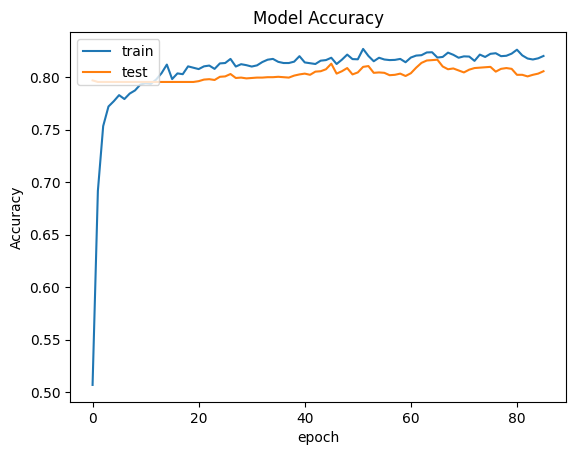

In [220]:
#  Summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

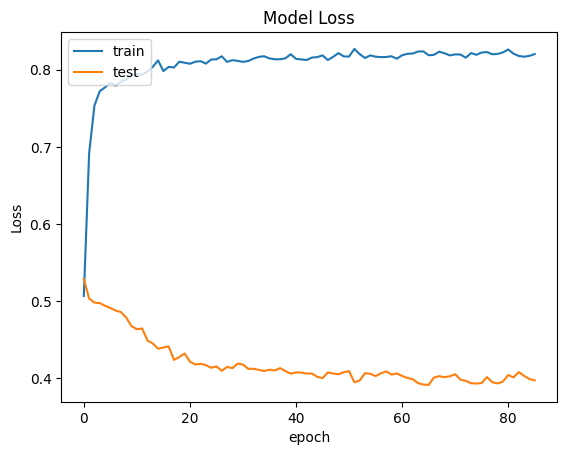

In [221]:
#  Summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [222]:
#  Making the predictions and evaluating the model
#  Predicting the test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 923us/step


In [223]:
#  Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 381,   24]], dtype=int64)

In [224]:
#  Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8095

In [225]:
#  Get the weights
classifier.get_weights()

[array([[ 0.07013461,  0.04090036,  0.0761238 , -0.05557233,  0.07227271,
          0.06819529, -0.02128122, -0.05569775,  0.04800608, -0.01436473,
         -0.01563713],
        [-1.1483399 ,  0.2369535 , -0.27996784,  0.15308243, -0.76875025,
         -0.75448865,  0.20623656,  0.49486643, -0.5460842 ,  0.09891599,
          0.4186797 ],
        [-0.05702369,  0.09746176,  0.12534001, -0.01891734,  0.07823513,
         -0.00235308,  0.04787312, -0.05658665,  0.04612424, -0.00995474,
          0.17339627],
        [-0.01035462,  0.4372102 , -0.5874992 , -0.5509862 , -0.15255196,
         -0.15793023,  0.1752035 ,  0.03220919,  0.10706307,  0.16969492,
         -0.13370785],
        [-0.17861882,  0.6954042 ,  0.58301586, -0.9102956 ,  0.33583432,
          0.10433231,  0.8700248 , -0.3524247 ,  0.08489913,  0.66825384,
          0.1136976 ],
        [ 0.0021997 , -0.07386656,  0.03432777, -0.07324354, -0.0735235 ,
         -0.02968574,  0.01219556,  0.03574141,  0.17236476, -0.0183084